<a href="https://colab.research.google.com/github/OrganicSpector/dbproject/blob/master/(HW5)Measuring_energy_levels_of_hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.4 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from numpy import linalg as la

In [4]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.0 MB/s eta 0:00:00


In [5]:
from qiskit_aer import AerSimulator

# Part 1: Measuring the state of a qubit
**Goal**

Determine the Bloch components of a qubit.

Fundamental to the operation of a quantum computer is the ability to compute the Bloch components of a qubit or qubits. These components correspond to the expectation values of the Pauli operators $X,Y,Z$, and are important quantities for applications such as quantum chemistry and optimization. Unfortunately, it is impossible to simultaneously compute these values, thus requiring many executions of the same circuit. In addition, measurements are restricted to the computational basis (Z-basis) so that each Pauli needs to be rotated to the standard basis to access the x and y components. Here we verify the methods by considering the case of a random vector on the Bloch sphere.

📓 1. **Express the expectation values of the Pauli operators for an arbitrary qubit state $|q\rangle$ in the computational basis.
The case for the expectation value of Pauli Z gate is given as an example.**

Using the *diagonal representation*, also known as spectral form or orthonormal decomposition, of Pauli  gate and the relations among the Pauli gates ([see here](https://learn.qiskit.org/course/ch-states/single-qubit-gates)), expectation values of  gates can be written as

\begin{align}
\langle Z\rangle &= \langle q|Z|q\rangle = \langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle =|\langle 0|q\rangle|^2 - |\langle 1|q\rangle|^2\\
\langle X\rangle &= \\
\langle Y\rangle &=
\end{align}

respectively.

Therefore, the expectation values of the Paulis for a qubit state $|q\rangle$ can be obtained by making a measurement in the standard basis after rotating the standard basis frame to lie along the corresponding axis. The probabilities of obtaining the two possible outcomes 0 and 1 are used to evaluate the desired expectation value as the above equations show.

For example, the basis defined by the vector
$$\vec{n}=(\sin\theta\cos\phi, \cos\theta\cos\phi, \cos\theta)$$
is
$$\{|\psi_{\vec{n}}\rangle, |\psi^\perp_{\vec{n}}\rangle\} = \left\{\cos\left(\frac{\theta}{2}\right)|0\rangle+e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle, \quad \sin\left(\frac{\theta}{2}\right)|0\rangle-e^{i\phi}\cos\left(\frac{\theta}{2}\right)|1\rangle\right\}$$
and to turn it into a Z-basis measurement, one should apply the unitary transformation first and then measure in Z-basis. The unitary transformation is
$$U = |0\rangle\langle \psi_{\vec{n}}| + |1\rangle\langle\psi^\perp_{\vec{n}}|$$
The general unitary [physical gate](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#U-gate) $u$ can be handy for this purpose. These are operations to which other gates are compiled down before running on real IBM quantum hardware. $u$ gate has the following matrix form
\begin{split}
    U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
\end{split}


2. **Measure the Bloch sphere coordinates of a qubit using the qasm simulator and plot the vector on the bloch sphere.**
### 📓Step A. Create a qubit state using the circuit method, initialize with two random complex numbers as the parameter.
Use the method `initialize`,



In [6]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

random_complex_numbers = np.random.rand(2) + 1j * np.random.rand(2)
random_complex_numbers /= np.linalg.norm(random_complex_numbers)

qc.initialize(random_complex_numbers, q[0])
print(qc)


    ┌───────────────────────────────────────────────┐
q1: ┤ Initialize(0.69202+0.083956j,0.0838+0.71207j) ├
    └───────────────────────────────────────────────┘


### 📓Step B. Build the circuits to measure the expectation values of  gate based on your answers to the question 1.

The circuit for Z gate measurement is given as an example.

In [7]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)


# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0, 0)
print(measure_x)






# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0, 0)
print(measure_y)
# your code goes here




     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
     ┌─────┐┌───┐┌─┐
  q: ┤ Sdg ├┤ H ├┤M├
     └─────┘└───┘└╥┘
c: 1/═════════════╩═
                  0 


### Run the cell below to estimate the bloch sphere coordinates of the qubit from step A using the qasm simulator.

In [8]:
shots = 2**14 # number of samples used for statistics

sim = AerSimulator()
bloch_vector_measure = []
for measure_circuit in [measure_x, measure_y, measure_z]:

    # run the circuit with a the selected measurement
    # and get the number of samples that output each bit value
    measure_circuit = transpile(measure_circuit, sim)
    counts = sim.run(qc.compose(measure_circuit),
                           shots=shots).result().get_counts()

    #counts = execute(qc.compose(measure_circuit),
    #                 sim, shots=shots).result().get_counts()

    # calculate the probabilxities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0

    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the bloch sphere vector
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))

The bloch sphere coordinates are [0.243, 0.970, -0.024]


### Step C. Plot the vector on the bloch sphere.

Note that the following cell for the interactive bloch_sphere would not run properly unless you work in IQX. You can either use plot_bloch_vector for the non-interactive version or install kaleidoscope by running

`pip install kaleidoscope`

in a terminal. You also need to restart your kernel after the installation. To learn more about how to use the interactive bloch sphere, [go here](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere).

In [9]:
!pip install kaleidoscope

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipy

In [ ]:
from kaleidoscope.interactive import bloch_sphere

bloch_sphere(bloch_vector, vectors_annotation=True)

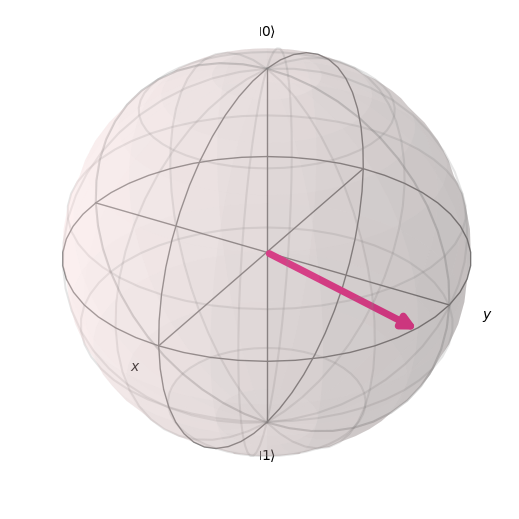

In [10]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector( bloch_vector )

# Part 2: Measuring Energy
**Goal**

Evaluate the energy levels of the hydrogen ground state using qasm simulator.

The energy of a quantum system can be estimated by measuring the expectation value of its hamiltonian, which is a hermitian operator, through the procedure we mastered in part 1.

The ground state of hydrogen is not defined as a single unique state but actually contains four different states due to the spins of the electron and proton. In part 2 of this lab, we evaluate the energy difference among these four states, which is from the `hyperfine splitting`, by computing the energy expectation value for the system of two spins with the hamiltonian expressed in Pauli operators. For more information about `hyperfine structure`, see [here](https://www.feynmanlectures.caltech.edu/III_12.html).

Consider the system with two qubit interaction hamiltonian
$$H = A(XX+YY+ZZ)$$
where $A = 1.47 \cdot 10^{-6}$ and $X,Y,Z$ are Pauli gates. Then the energy expectation value of the system can be evaluated by combining the expectation value of each term in the hamiltonian. In this case,
$$E = \langle H\rangle = A(\langle XX\rangle+\langle YY\rangle+\langle ZZ\rangle).$$



📓 1. **Express the expectation value of each term in the hamiltonian for an arbitrary two qubit state $|\psi\rangle$ in the computational basis.**

The case for the term $\langle ZZ\rangle$ is given as an example.
\begin{align}
\langle ZZ\rangle = \langle \psi|ZZ|\psi\rangle &=
\langle \psi|\big(|0\rangle\langle 0|-|1\rangle\langle 1|\big)\otimes \big(|0\rangle\langle 0|-|1\rangle\langle 1|\big)|\psi\rangle \nonumber\\&= |\langle 00|\psi\rangle|^2 -|\langle 01|\psi\rangle|^2-|\langle 10|\psi\rangle|^2+|\langle 11|\psi\rangle|^2 \\\\
\langle XX\rangle =\langle \psi|XX|\psi\rangle &=\\\\
\langle YY\rangle =\langle \psi|YY|\psi\rangle &=
\end{align}


2. **Measure the expected energy of the system using the qasm simulator when two qubits are entangled. Regard the bell basis, four different entangled states.**
### 📓Step A. Construct the circuits to prepare four different bell states.
Let's label each bell state as,

\begin{align}
Tri_1 &= \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)\\
Tri_2 &= \frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)\\
Tri_3 &= \frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)\\
Sing &= \frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)\\
\end{align}


In [14]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2)


Tri1.h(0)
Tri1.cx(0, 1)


# circuit for the state Tri2
Tri2 = QuantumCircuit(2)

Tri2.h(0)
Tri2.cx(0, 1)
Tri2.z(0)


# circuit for the state Tri3
Tri3 = QuantumCircuit(2)


Tri3.h(0)
Tri3.cx(0, 1)
Tri3.x(1)


# circuit for the state Sing
Sing = QuantumCircuit(2)

Sing.h(0)
Sing.cx(0, 1)
Sing.x(1)
Sing.z(0)

### 📓Step B. Create the circuits to measure the expectation value of each term in the hamiltonian based on your answer to the question 1.

To perform these measurements, the standard basis must be rotated to the proper, Z, basis ($\{|0\rangle,|1\rangle\}$) when it is needed.


In [ ]:
# <ZZ>
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)

measure_XX.h(0)
measure_XX.h(1)
measure_XX.measure_all()


# <YY>
measure_YY = QuantumCircuit(2)


measure_YY.sdg(0)
measure_YY.sdg(1)
measure_YY.h(0)
measure_YY.h(1)
measure_YY.measure_all()




### Step C. Execute the circuits on qasm simulator by runnng the cell below and evaluate the energy expectation value for each state.


In [15]:
shots = 2**14 # number of samples used for statistics

A = 1.47e-6 #unit of A is eV
E_sim = []
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:

        # run the circuit with a the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc = transpile(qc, sim)
        counts = sim.run(qc, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0

        Energy_meas.append(probs['00'] - probs['01'] - probs['10'] + probs['11'])

    E_sim.append(A * np.sum(np.array(Energy_meas)))

NameError: name 'measure_XX' is not defined

In [16]:
# Run this cell to print out your results

print('Energy expection value of the state Tri1 : {:.3e} eV'.format(E_sim[0]))
print('Energy expection value of the state Tri2 : {:.3e} eV'.format(E_sim[1]))
print('Energy expection value of the state Tri3 : {:.3e} eV'.format(E_sim[2]))
print('Energy expection value of the state Sing : {:.3e} eV'.format(E_sim[3]))

IndexError: list index out of range

#### Step D. Understanding the result.
If you found the energy expectation values successfully, you would have obtained exactly the same value, $A(= 1.47 \cdot 10^{-6} eV)$, for the trplet tates, $|Tri1\rangle, |Tri2\rangle, |Tri3\rangle$, and one lower energy level, $-3A(= -4.41 \cdot 10^{-6} eV)$, for the singlet state $|Sing\rangle$.

What we have done here is measuring the energies of the four different spin states corresponding to the ground state of hydrogen and observed `hyperfine structure` in the energy levels caused by spin-spin coupling. This tiny energy difference between the singlet and triplet states is the reason for the famous 21-cm wavelength radiation used to map the structure of the galaxy.

In the cell below, we varify the wavelength of the emission from the transition between the triplet states and singlet state.

In [17]:
# reduced plank constant in (eV) and the speed of light(cgs units)
hbar, c = 4.1357e-15, 3e10

# energy difference between the triplets and singlet
E_del = abs(E_sim[0] - E_sim[3])

# frequency associated with the energy difference
f = E_del/hbar

# convert frequency to wavelength in (cm)
wavelength = c/f

print('The wavelength of the radiation from the transition\
 in the hyperfine structure is : {:.1f} cm'.format(wavelength))

IndexError: list index out of range